In [63]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
import numpy.linalg as LA
np.set_printoptions(precision = 3)

In [64]:
vectors = 10000

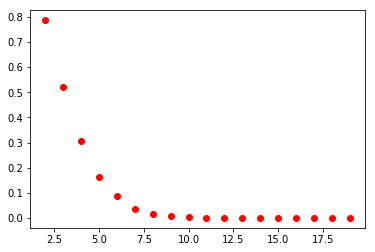

In [67]:
def ratio (d):  
  uniform = rng.random((vectors, d))*2-1  
  normOfVector= LA.norm(uniform, axis=1)
  insideHypersphere = 1*(normOfVector <=1)
  return sum(insideHypersphere)/vectors
darray = np.arange(2,20)
vectorRatio = np.vectorize(ratio)
plt.plot(darray, vectorRatio(darray), 'ro')

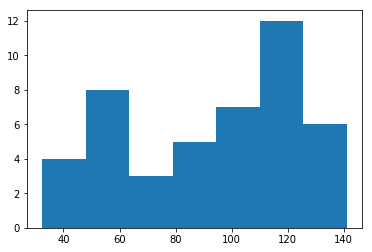

In [106]:
d=6
vectors = 10
uniform = rng.random((vectors, d))*2-1
indexPairs = np.array(np.indices((vectors,vectors))).T.reshape(-1,2)
index1, index2 = np.array(indexPairs[indexPairs[:,0]<indexPairs[:,1]]).T

#print (index1, index2)

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

@np.vectorize
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    #print (v1, v2)
    v1_u = unit_vector(uniform[v1])
    v2_u = unit_vector(uniform[v2])
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

angels = np.degrees(angle_between(index1,index2))
plt.hist(angels, bins='auto')
plt.show()
